In [1]:
#python specific stuff
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import *


Text(0, 0.5, 'Temperature (C)')

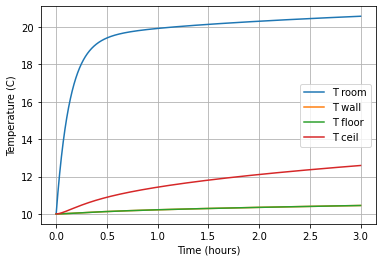

In [2]:
## INITIALIZATION for time
total_time_h=3 #hours
t_step=1 #s
total_time_s=total_time_h*60*60
N_t_steps=int(total_time_s/t_step)

#output surfaces initialization
#use function output_surface_parameters(U (possible vector of length N_cells),HTC,densityC,thickness,area,N_cells,initial_T):
#each surface is a class with defined parameters
initial_T=10
floor=output_surface_parameters(1.3,6.4,1680000,0.175,500,100,initial_T)
wall=output_surface_parameters(1.3,6.4,1680000,0.175,210,100,initial_T)
ceil=output_surface_parameters(0.1,6.4,494000,0.05,500,100,initial_T)
output_surface_array=[floor,wall,ceil]

# room initalization
T_room=10
Qin_room=71847 # some constant value set by heaters
volume_room=3000
densityC_room =1206

data_array_T_wall=np.zeros(int(N_t_steps))
data_array_T_floor=np.zeros(int(N_t_steps))
data_array_T_ceil=np.zeros(int(N_t_steps))
data_array_T_room=np.zeros(int(N_t_steps))

for t in range(N_t_steps):

    data_array_T_room[t]=T_room
    data_array_T_wall[t]=wall.T_array[0]
    data_array_T_floor[t]=floor.T_array[0]
    data_array_T_ceil[t]=ceil.T_array[0]

    Qout_room_total=0
    
    for output_surface in output_surface_array:
        #calculate Qout for room/surface boundary
        Qout_room_to_surface=calculate_Qout_convective(output_surface.HTC,output_surface.area,T_room,output_surface.T_array[0])
        Qout_room_total=Qout_room_total+Qout_room_to_surface  
        #calculate Qout/Qin for interior of surface
        Qout_xarray=calculate_Qout_conductive(output_surface.THcond,output_surface.area,output_surface.T_array[0:output_surface.N_cells-1],output_surface.T_array[1:output_surface.N_cells],output_surface.cell_length)
        Qin_xarray=np.append(Qout_room_to_surface,Qout_xarray[0:output_surface.N_cells-2])
        #update surface interior temperatures
        output_surface.T_array=output_surface.T_array+np.append(calculate_Tchange(Qin_xarray[0:output_surface.N_cells-1],Qout_xarray,t_step,output_surface.densityC,output_surface.volume_cell),[0]) 

    #update Temp of room using Qins and Qouts
    T_room=T_room+calculate_Tchange(Qin_room,Qout_room_total,t_step,densityC_room,volume_room)


# MAKE PLOTS ##########################

t_array=np.arange(0,N_t_steps*t_step,t_step)/(60*60)
plt.plot(t_array,data_array_T_room,label='T room')
plt.plot(t_array,data_array_T_wall,label='T wall')
plt.plot(t_array,data_array_T_floor,label='T floor')
plt.plot(t_array,data_array_T_ceil,label='T ceil')
plt.legend()
plt.grid('True')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (C)')
